In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=2.5)
import os
import torch
from torchvision.utils import make_grid, save_image

## Convergence

In [2]:
def compute_diffs(data):
    gW_o = data['W_o']
    gb_o = data['b_o']
    gW_h = data['W_h']
    gb_h = data['b_h']
    gW_x = data['W_x']
    tensor = torch.cat([gW_o.view(gW_o.shape[0], gW_o.shape[1], -1),
                       gb_o.view(gb_o.shape[0], gb_o.shape[1], -1),
                       gW_h.view(gW_h.shape[0], gW_h.shape[1], -1),
                       gb_h.view(gb_h.shape[0], gb_h.shape[1], -1),
                       gW_x.view(gW_x.shape[0], gW_x.shape[1], -1)], dim=-1)
    
    return torch.norm(tensor[:, -1:, :] - tensor, dim=-1)

def plot_convergence(filename):
    plt.figure(figsize=(12, 8))
    data = torch.load('plot_data/GS_convergence_{}.pth'.format(filename))
    results = compute_diffs(data)
    mean_error = results.mean(dim=0).cpu().numpy()
    std_error = results.std(dim=0).cpu().numpy()
    plt.plot(np.r_[1:len(mean_error)+1], mean_error, '-', lw=6, color='r')
    plt.fill_between(np.r_[1:len(mean_error)+1], mean_error + std_error, mean_error - std_error, facecolor='r', alpha=0.5)
    
    data = torch.load('plot_data/Jacobi_convergence_{}.pth'.format(filename))
    results = compute_diffs(data)
    mean_error = results.mean(dim=0).cpu().numpy()
    std_error = results.std(dim=0).cpu().numpy()
    plt.plot(np.r_[1:len(mean_error)+1], mean_error, '-', lw=6, color='b')
    plt.fill_between(np.r_[1:len(mean_error)+1], mean_error + std_error, mean_error - std_error, facecolor='b', alpha=0.5)
    
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.xlim([0,100])
    
    plt.legend(['Feedforward', 'Jacobi'])

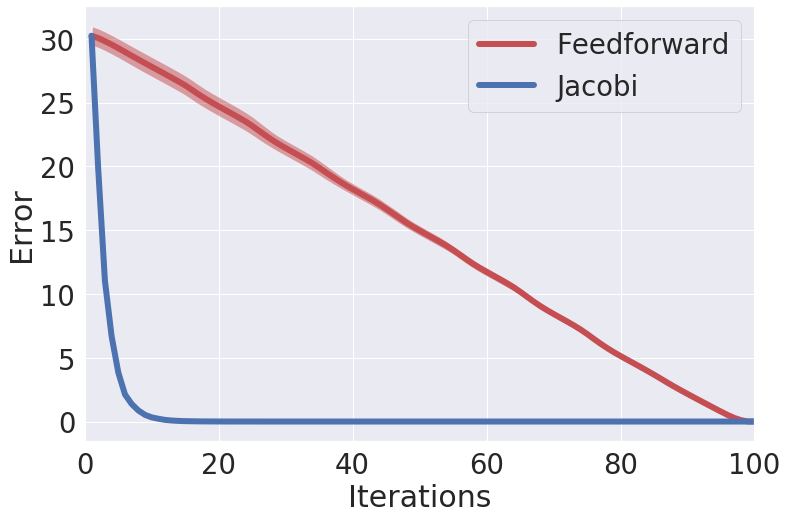

In [3]:
plot_convergence('begin')
plt.savefig('rnn_begin.png', dpi=150, bbox_inches='tight')

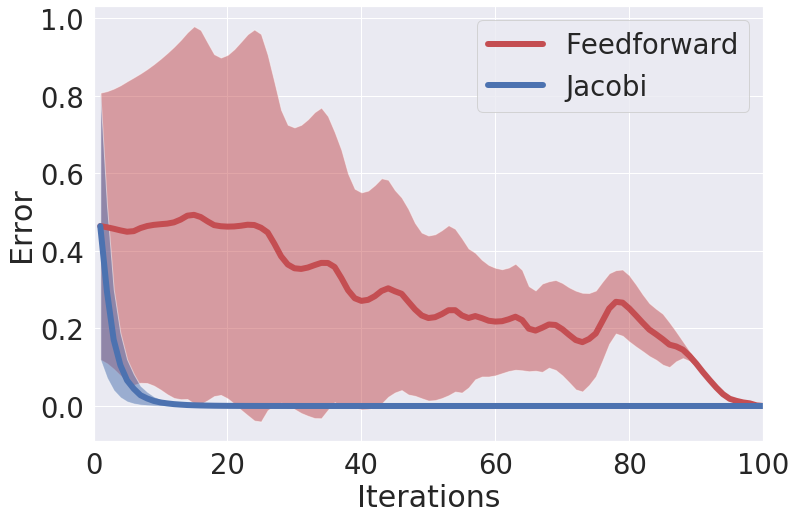

In [4]:
plot_convergence('end')
plt.savefig('rnn_end.png', dpi=150, bbox_inches='tight')

# Optimization Performance

In [11]:
colors = sns.color_palette('colorblind')

In [12]:
def plot_training(filename, color):
    data = torch.load('plot_data/{}.pth'.format(filename))
    loss = data['loss']
    time = data['time']
    avg_time = time.mean(dim=0).cpu().numpy()
    
    mean_error = torch.log(loss).mean(dim=0).cpu().numpy()
    std_error = torch.log(loss).std(dim=0).cpu().numpy() / 10.
    plt.plot(avg_time, mean_error, '-', lw=6, color=color)
    plt.fill_between(avg_time, mean_error + std_error, mean_error - std_error, facecolor=color, alpha=0.5)

def plot_all():
    plt.figure(figsize=(12, 8))
    plot_training('GS_RNN', colors[0])
    plot_training('Jacobi_RNN_10', colors[1])
    plot_training('Jacobi_RNN_20', colors[2])
    plot_training('Jacobi_RNN_30', colors[3])
    plot_training('Jacobi_RNN_50', colors[4])
    plot_training('Jacobi_RNN_80', colors[5])
    plt.xlim([0,3])
    plt.legend(['Feedforward', 'Jacobi$_{10}$', 'Jacobi$_{20}$', 'Jacobi$_{30}$', 'Jacobi$_{50}$', 'Jacobi$_{80}$'])
    plt.xlabel('Wall-Clock Time (s)')
    plt.ylabel('Log-Loss')

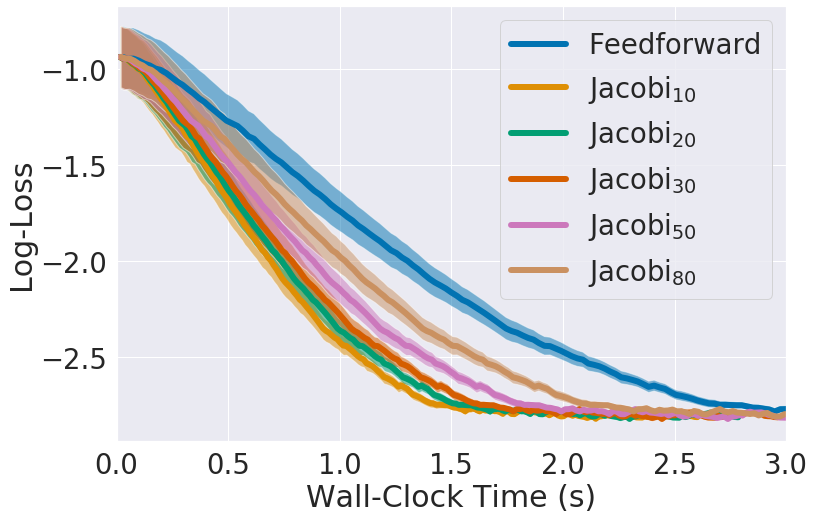

In [13]:
plot_all()
plt.savefig('rnn_backprop.png', dpi=150, bbox_inches='tight')

In [14]:
def plot_training(filename, color):
    data = torch.load('plot_data/{}.pth'.format(filename))
    loss = data['loss']
    time = data['time']    
    mean_error = torch.log(loss).mean(dim=0).cpu().numpy()
    std_error = torch.log(loss).std(dim=0).cpu().numpy() / 10.
    iters = np.r_[:len(mean_error)]
    plt.plot(iters, mean_error, '-', lw=6, color=color)
    plt.fill_between(iters, mean_error + std_error, mean_error - std_error, facecolor=color, alpha=0.1)

def plot_all():
    plt.figure(figsize=(12, 8))
    plot_training('GS_RNN', colors[0])
    plot_training('Jacobi_RNN_10', colors[1])
    plot_training('Jacobi_RNN_20', colors[2])
    plot_training('Jacobi_RNN_30', colors[3])
    plot_training('Jacobi_RNN_50', colors[4])
    plot_training('Jacobi_RNN_80', colors[5])
    plt.xlim([0,200])
    plt.legend(['Feedforward', 'Jacobi$_{10}$', 'Jacobi$_{20}$', 'Jacobi$_{30}$', 'Jacobi$_{50}$', 'Jacobi$_{80}$'])
    plt.xlabel('Parallel Iterations')
    plt.ylabel('Log-Loss')

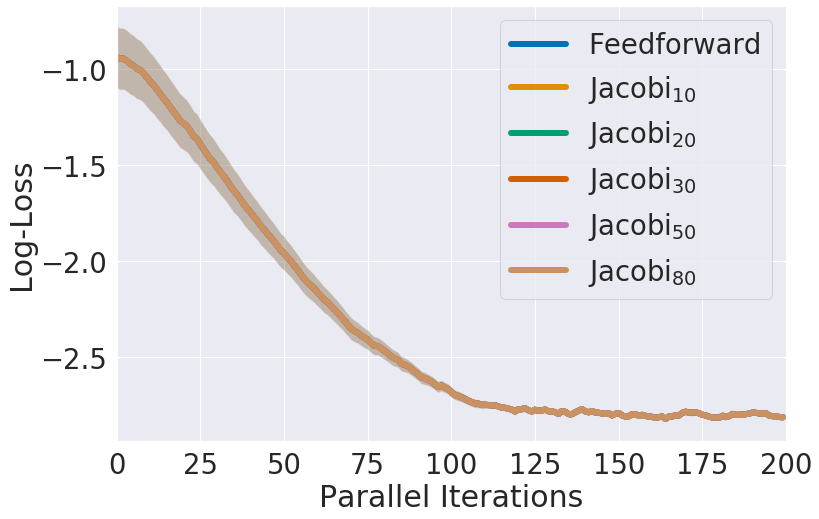

In [15]:
plot_all()
plt.savefig('rnn_backprop_iter.png', dpi=150, bbox_inches='tight')